In [15]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_SimplePie/'

In [3]:
bscore=pd.read_csv('M_BDScore.csv')

In [4]:
bscore

,Participant,Block Design Raw Score
0,C002,28
1,C004,30
2,C005,46
3,C010,54
4,C011,34
5,C014,32
6,C015,33
7,C018,50
8,C019,40
9,C022,32


In [5]:
final_df=pd.read_csv('PositionDistance_SimplePie.csv')

In [6]:
final_df = pd.merge(bscore, final_df, on='Participant', how='inner')
final_df

,Participant,Block Design Raw Score,Chest,HeadCamera,LeftElbow,LeftShoulder,MotionControllerLeft,MotionControllerRight,RightElbow,RightShoulder
0,C002,28,3540.337685,4920.962251,5769.977725,4748.732604,7305.247009,12874.805034,9951.623287,7406.876749
1,C004,30,2577.946109,3582.167852,5175.122021,3794.190422,6173.798725,5728.355616,2380.548588,3401.852120
2,C005,46,3101.189815,5242.910113,5729.878784,5343.179186,14551.018086,7150.648100,7233.666213,5496.841569
3,C010,54,3536.785029,4337.159624,5563.083264,4612.295155,7148.163559,10739.234159,7465.590741,5310.335912
4,C011,34,1016.264494,1066.769295,1683.153449,1419.085839,1624.778017,3841.361179,2158.849534,1827.696099
5,C014,32,3352.784517,4785.264969,9807.955035,5351.594257,9710.043987,12345.539981,9105.250967,6666.490424
6,C015,33,3357.411882,3933.139281,4010.717193,3817.265229,4359.665984,9270.873866,7056.302227,5281.368708
7,C018,50,3157.765553,4684.105489,5230.733667,4447.791272,6727.656318,10388.141859,6715.892551,4911.885231
8,C019,40,1383.847297,2338.284810,2423.513426,1922.001229,4866.029531,4861.301072,5490.140021,3478.463575
9,C022,32,5723.482644,7363.255247,7339.619020,6814.769553,8178.021958,17749.288619,11668.909577,9151.521791


#### Scatter plot between block design scores and total distance (Trackers)

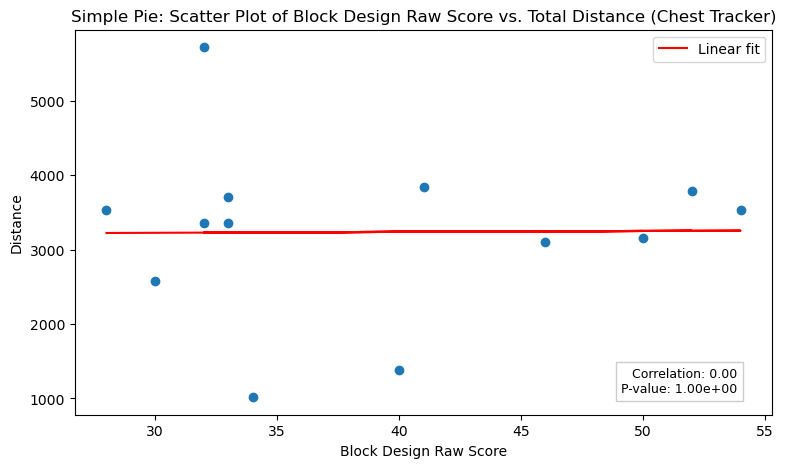

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

chest_df = final_df[final_df['Chest'] != 0]
correlation, p_value = spearmanr(chest_df['Block Design Raw Score'], chest_df['Chest'])
plt.figure(figsize=(9,5))
plt.scatter(chest_df['Block Design Raw Score'], chest_df['Chest'])

# Calculate linear fit
slope, intercept = np.polyfit(chest_df['Block Design Raw Score'], chest_df['Chest'], 1)
fit_line = slope * chest_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(chest_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Total Distance (Chest Tracker)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '1 SP_DistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

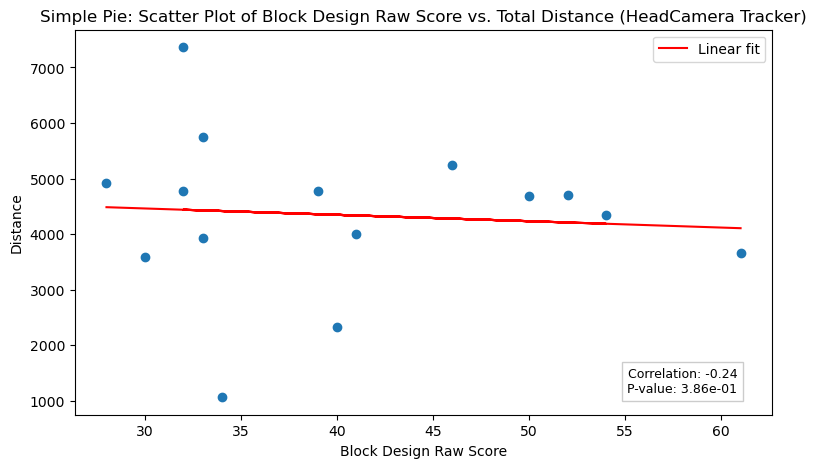

In [8]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['HeadCamera'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['HeadCamera'])

slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['HeadCamera'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Total Distance (HeadCamera Tracker)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '2 SP_DistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

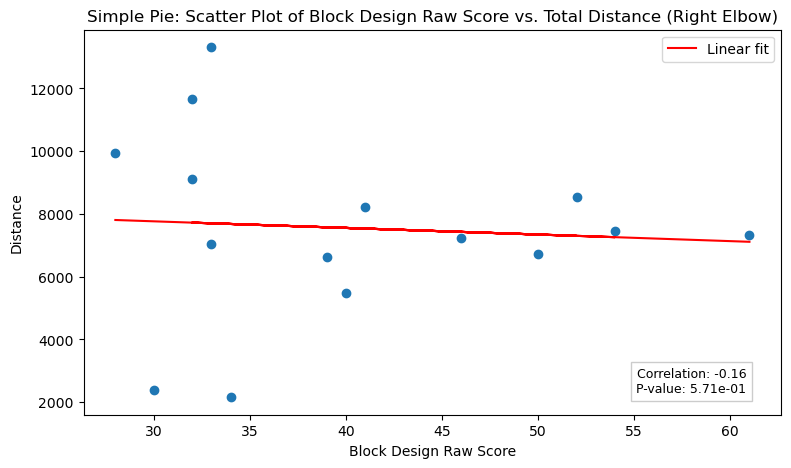

In [9]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['RightElbow'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['RightElbow'])


slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['RightElbow'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Total Distance (Right Elbow)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '3 SP_DistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

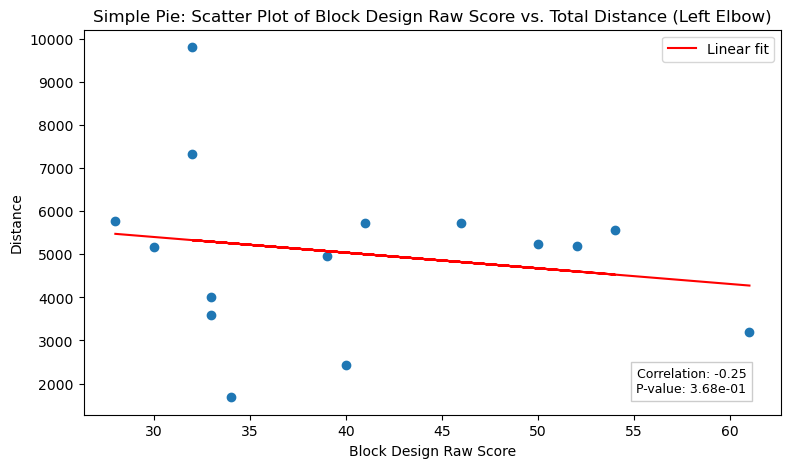

In [10]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['LeftElbow'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['LeftElbow'])


slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['LeftElbow'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Total Distance (Left Elbow)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '4 SP_DistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

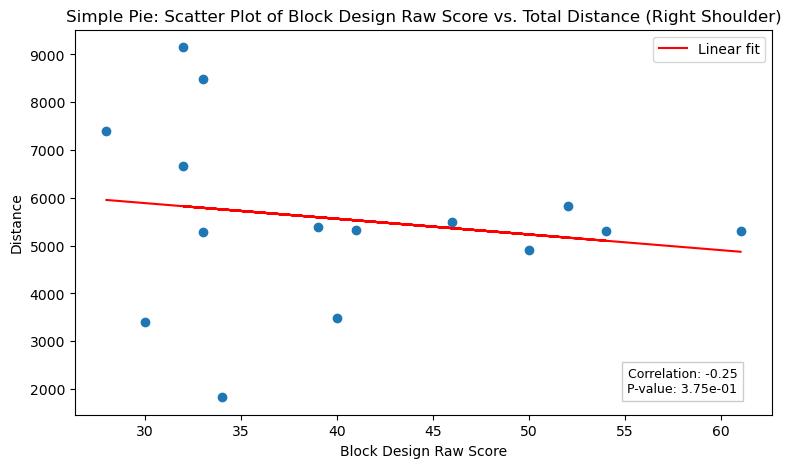

In [11]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['RightShoulder'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['RightShoulder'])


slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['RightShoulder'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Total Distance (Right Shoulder)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '5 SP_DistanceRightShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

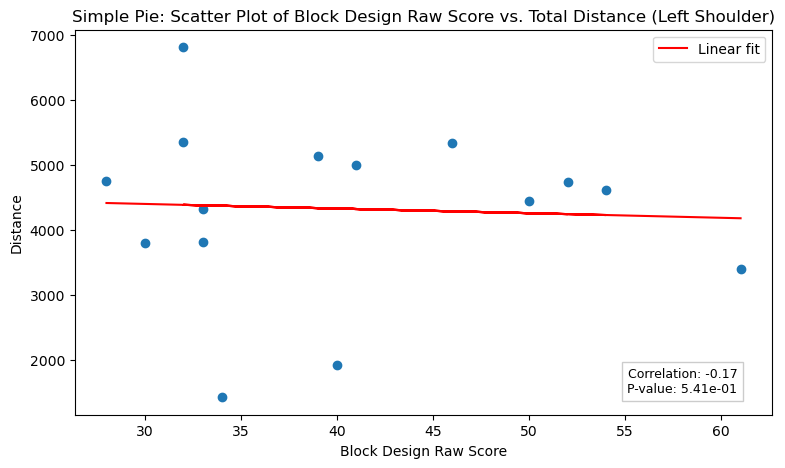

In [12]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['LeftShoulder'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['LeftShoulder'])


slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['LeftShoulder'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Total Distance (Left Shoulder)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '6 SP_DistanceLeftShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

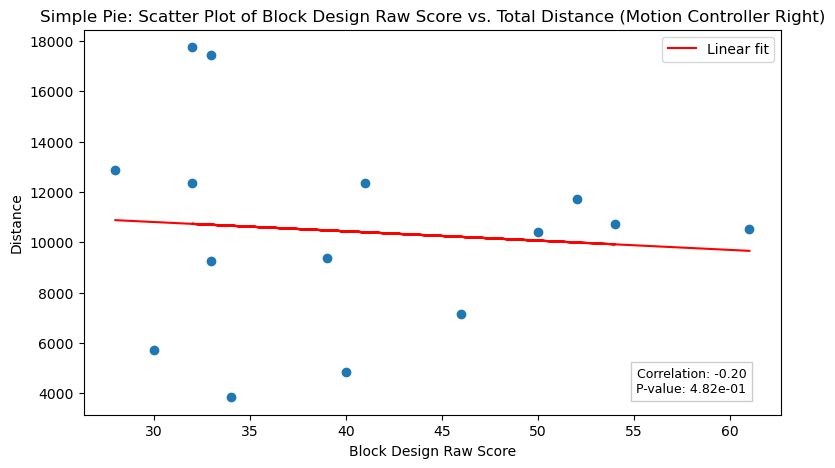

In [13]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['MotionControllerRight'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['MotionControllerRight'])

slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['MotionControllerRight'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Total Distance (Motion Controller Right)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '7 SP_DistanceMotionContRight.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

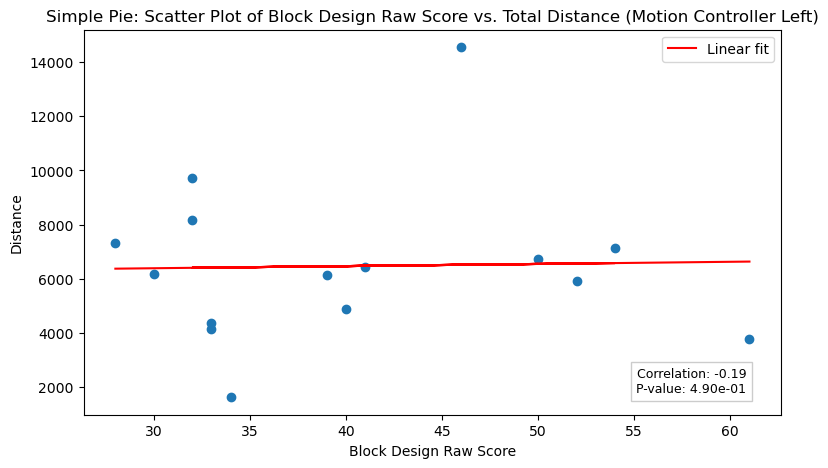

In [14]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['MotionControllerLeft'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['MotionControllerLeft'])

slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['MotionControllerLeft'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Total Distance (Motion Controller Left)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '8 SP_DistanceMotionContLeft.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

In [17]:
def extract_dataframe(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
        
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                exec(cell.source, {}, local_context)
                if 'combined_pivot_df' in local_context:
                    return local_context['combined_pivot_df']
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None

# List to store dataframes from each notebook
dataframes = []

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_SimplePie/'
file_pattern = directory + '*_Movement.ipynb'

# Extract data from each notebook
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4]  # Extract the first 4 characters of the filename
    df = extract_dataframe(file_path)
    if df is not None:
        df['Participant'] = participant_id  # Add a new column for Participant ID
        dataframes.append(df)

# Combine all dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df

Tracker,Step,Chest Euclidean Distance,HeadCamera Euclidean Distance,LeftElbow Euclidean Distance,LeftShoulder Euclidean Distance,MotionControllerLeft Euclidean Distance,MotionControllerRight Euclidean Distance,RightElbow Euclidean Distance,RightShoulder Euclidean Distance,Participant
0,Add Sugar,1219.616559,1523.925405,2250.325627,1662.424118,2844.636220,3298.153806,2615.483562,1900.866426,C002
1,Add apples to pan,435.107928,624.805110,705.801971,563.893022,947.840128,2663.391550,1870.306193,1190.412091,C002
2,Add bottom crust,53.273302,88.183706,143.509746,106.380332,197.191375,228.829956,168.522406,127.496363,C002
3,Add butter,137.426355,194.928198,106.500109,127.648978,146.091674,589.989980,508.080445,347.615839,C002
4,Add cinnamon,176.543370,222.538848,255.328186,240.098530,281.452259,598.823083,455.591867,358.320554,C002
...,...,...,...,...,...,...,...,...,...,...
151,Add water,0.000000,153.172920,101.138352,112.885864,96.159424,334.919137,252.001808,193.755430,C031
152,Post last step,0.000000,611.769471,522.835408,520.365596,568.774004,1372.255728,949.521671,712.289876,C031
153,Pour syrup,0.000000,117.794713,106.429621,106.065067,121.648103,282.336231,251.420492,188.249879,C031
154,Put pie in oven,0.000000,528.809546,390.970210,412.549653,519.111017,1113.653979,866.071520,639.752686,C031


In [18]:
final_df = pd.merge(bscore, combined_df, on='Participant', how='inner')
final_df

,Participant,Block Design Raw Score,Step,Chest Euclidean Distance,HeadCamera Euclidean Distance,LeftElbow Euclidean Distance,LeftShoulder Euclidean Distance,MotionControllerLeft Euclidean Distance,MotionControllerRight Euclidean Distance,RightElbow Euclidean Distance,RightShoulder Euclidean Distance
0,C002,28,Add Sugar,1219.616559,1523.925405,2250.325627,1662.424118,2844.636220,3298.153806,2615.483562,1900.866426
1,C002,28,Add apples to pan,435.107928,624.805110,705.801971,563.893022,947.840128,2663.391550,1870.306193,1190.412091
2,C002,28,Add bottom crust,53.273302,88.183706,143.509746,106.380332,197.191375,228.829956,168.522406,127.496363
3,C002,28,Add butter,137.426355,194.928198,106.500109,127.648978,146.091674,589.989980,508.080445,347.615839
4,C002,28,Add cinnamon,176.543370,222.538848,255.328186,240.098530,281.452259,598.823083,455.591867,358.320554
...,...,...,...,...,...,...,...,...,...,...,...
151,C031,61,Add water,0.000000,153.172920,101.138352,112.885864,96.159424,334.919137,252.001808,193.755430
152,C031,61,Post last step,0.000000,611.769471,522.835408,520.365596,568.774004,1372.255728,949.521671,712.289876
153,C031,61,Pour syrup,0.000000,117.794713,106.429621,106.065067,121.648103,282.336231,251.420492,188.249879
154,C031,61,Put pie in oven,0.000000,528.809546,390.970210,412.549653,519.111017,1113.653979,866.071520,639.752686


In [19]:
column_rename = {
    'Chest Euclidean Distance': 'Chest Distance',
    'HeadCamera Euclidean Distance': 'HeadCamera Distance',
    'LeftElbow Euclidean Distance': 'LeftElbow Distance',
    'LeftShoulder Euclidean Distance': 'LeftShoulder Distance',
    'MotionControllerLeft Euclidean Distance': 'MotionControllerLeft Distance',
    'MotionControllerRight Euclidean Distance': 'MotionControllerRight Distance',
    'RightElbow Euclidean Distance': 'RightElbow Distance',
    'RightShoulder Euclidean Distance': 'RightShoulder Distance'
}

final_df = final_df.rename(columns=column_rename)
final_df

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
0,C002,28,Add Sugar,1219.616559,1523.925405,2250.325627,1662.424118,2844.636220,3298.153806,2615.483562,1900.866426
1,C002,28,Add apples to pan,435.107928,624.805110,705.801971,563.893022,947.840128,2663.391550,1870.306193,1190.412091
2,C002,28,Add bottom crust,53.273302,88.183706,143.509746,106.380332,197.191375,228.829956,168.522406,127.496363
3,C002,28,Add butter,137.426355,194.928198,106.500109,127.648978,146.091674,589.989980,508.080445,347.615839
4,C002,28,Add cinnamon,176.543370,222.538848,255.328186,240.098530,281.452259,598.823083,455.591867,358.320554
...,...,...,...,...,...,...,...,...,...,...,...
151,C031,61,Add water,0.000000,153.172920,101.138352,112.885864,96.159424,334.919137,252.001808,193.755430
152,C031,61,Post last step,0.000000,611.769471,522.835408,520.365596,568.774004,1372.255728,949.521671,712.289876
153,C031,61,Pour syrup,0.000000,117.794713,106.429621,106.065067,121.648103,282.336231,251.420492,188.249879
154,C031,61,Put pie in oven,0.000000,528.809546,390.970210,412.549653,519.111017,1113.653979,866.071520,639.752686


In [20]:
#final_df.to_csv('SimplePie_MS_PerStep.csv',index=False)